In [1]:
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np
import seaborn as sns

C:\Users\remib\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\remib\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\remib\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Closing_Odds_df = pd.read_csv("closing_odds.csv")
Closing_Odds=Closing_Odds_df.copy()
Closing_Odds

match_id                   league  match_date     home_team  \
0         170088  England: Premier League  2005-01-01     Liverpool   
1         170089  England: Premier League  2005-01-01        Fulham   
2         170090  England: Premier League  2005-01-01   Aston Villa   
3         170091  England: Premier League  2005-01-01        Bolton   
4         170092  England: Premier League  2005-01-01      Charlton   
...          ...                      ...         ...           ...   
479435    876806     World: Club Friendly  2015-06-30    St. Gallen   
479436    876807     World: Club Friendly  2015-06-30  SW Harelbeke   
479437    876808     World: Club Friendly  2015-06-30       Torhout   
479438    876809     World: Club Friendly  2015-06-30       Tournai   
479439    876812     World: Club Friendly  2015-06-30         Zavrc   

        home_score          away_team  away_score  avg_odds_home_win  \
0                0            Chelsea           1             2.9944   
1                3     Crystal Palace           1             1.9456   
2                1          Blackburn           0             1.8522   
3                1          West Brom           1             1.6122   
4                1            Arsenal           3             5.9878   
...            ...                ...         ...                ...   
479435           1   Wacker Innsbruck           2             1.6838   
479436           1            Waregem           1            13.1165   
479437           0        Club Brugge           5            17.2256   
479438           0  Mouscron Peruwelz           3            15.7143   
479439           0         Istra 1961           0             4.7145   

        avg_odds_draw  avg_odds_away_win  max_odds_home_win  max_odds_draw  \
0              3.1944             2.2256               3.20           3.25   
1              3.2333             3.6722               2.04           3.30   
2              3.2611             4.0144               2.00           3.40   
3              3.4133             5.4722               1.67           3.57   
4              3.4778             1.5567               7.00           3.60   
...               ...                ...                ...            ...   
479435         3.8846             3.9813               1.83           4.20   
479436         7.8229             1.1053              19.00           9.00   
479437        12.6231             1.0288              22.00          15.00   
479438        10.2857             1.0614              34.00          12.00   
479439         3.9259             1.5650               5.46           4.25   

        max_odds_away_win top_bookie_home_win  top_bookie_draw  \
0                    2.29         Paddy Power      Sportingbet   
1                    4.15     Pinnacle Sports      bet-at-home   
2                    4.50     Pinnacle Sports      Paddy Power   
3                    6.27               Coral  Pinnacle Sports   
4                    1.62              Expekt      Paddy Power   
...                   ...                 ...              ...   
479435               4.33              188BET           bet365   
479436               1.13           BetVictor           bet365   
479437               1.05           BetVictor          Jetbull   
479438               1.10         Sportingbet          Betclic   
479439               1.70     Pinnacle Sports         888sport   

       top_bookie_away_win  n_odds_home_win  n_odds_draw  n_odds_away_win  
0                   Expekt                9            9                9  
1                   Expekt                9            9                9  
2              Sportingbet                9            9                9  
3          Pinnacle Sports                9            9                9  
4                   bet365                9            9                9  
...                    ...              ...          ...              ...  
479435           Ladbrokes  

# PLAN :

### I - Overall exploratory analysis of the data
- Distribution of results and goals
- Year by Year analysis
- Bookmaker companies analysis
- Geographical (leagues/countries) analysis

### II - Introduction of the paper's strategy
- Second overall analysis based on the paper's inputs
- Feature Engineering

### III - Models
- Models choice and training
- Results evaluations and conclusions


Before we develop a model and dive deep into the paper's strategy, we should get comfortable with our data, try to anticipate potential biases in the data collection, highlight tendencies and detect data that need cleaning/transforming.


## I - Overall exploratory analysis 

First, we add result column to the dataset, to save us time when checking game outcomes. 

In [3]:
result = 1 * (Closing_Odds['home_score'] > Closing_Odds['away_score']) \
       - 1 * (Closing_Odds['home_score'] < Closing_Odds['away_score'])
        # + 0 * (Closing_Odds['home_score'] == Closing_Odds['away_score'])

#My result column : 1 for H, 0 for D and -1 for A

    
Closing_Odds.insert(7 ,'result' , result)

Closing_Odds

match_id                   league  match_date     home_team  \
0         170088  England: Premier League  2005-01-01     Liverpool   
1         170089  England: Premier League  2005-01-01        Fulham   
2         170090  England: Premier League  2005-01-01   Aston Villa   
3         170091  England: Premier League  2005-01-01        Bolton   
4         170092  England: Premier League  2005-01-01      Charlton   
...          ...                      ...         ...           ...   
479435    876806     World: Club Friendly  2015-06-30    St. Gallen   
479436    876807     World: Club Friendly  2015-06-30  SW Harelbeke   
479437    876808     World: Club Friendly  2015-06-30       Torhout   
479438    876809     World: Club Friendly  2015-06-30       Tournai   
479439    876812     World: Club Friendly  2015-06-30         Zavrc   

        home_score          away_team  away_score  result  goal_difference  \
0                0            Chelsea           1      -1               -1   
1                3     Crystal Palace           1       1                2   
2                1          Blackburn           0       1                1   
3                1          West Brom           1       0                0   
4                1            Arsenal           3      -1               -2   
...            ...                ...         ...     ...              ...   
479435           1   Wacker Innsbruck           2      -1               -1   
479436           1            Waregem           1       0                0   
479437           0        Club Brugge           5      -1               -5   
479438           0  Mouscron Peruwelz           3      -1               -3   
479439           0         Istra 1961           0       0                0   

        avg_odds_home_win  ...  avg_odds_away_win  max_odds_home_win  \
0                  2.9944  ...             2.2256               3.20   
1                  1.9456  ...             3.6722               2.04   
2                  1.8522  ...             4.0144               2.00   
3                  1.6122  ...             5.4722               1.67   
4                  5.9878  ...             1.5567               7.00   
...                   ...  ...                ...                ...   
479435             1.6838  ...             3.9813               1.83   
479436            13.1165  ...             1.1053              19.00   
479437            17.2256  ...             1.0288              22.00   
479438            15.7143  ...             1.0614              34.00   
479439             4.7145  ...             1.5650               5.46   

        max_odds_draw  max_odds_away_win  top_bookie_home_win  \
0                3.25               2.29          Paddy Power   
1                3.30               4.15      Pinnacle Sports   
2                3.40               4.50      Pinnacle Sports   
3                3.57               6.27                Coral   
4                3.60               1.62               Expekt   
...               ...                ...                  ...   
479435           4.20               4.33               188BET   
479436           9.00               1.13            BetVictor   
479437          15.00               1.05            BetVictor   
479438          12.00               1.10          Sportingbet   
479439           4.25               1.70      Pinnacle Sports   

        top_bookie_draw top_bookie_away_win n_odds_home_win  n_odds_draw  \
0           Sportingbet              Expekt               9            9   
1           bet-at-home              Expekt               9            9   
2           Paddy Power         Sportingbet               9            9   
3       Pinnacle Sports     Pinnacle Sports               9            9   
4           Paddy Power              bet365               9            9   
...                 ...                 ...             ...          ...   
479435           bet365           Ladbro

In [4]:
X = ['Home','Draw','Away']
Y = [100*len(Closing_Odds[Closing_Odds['result']>0])/len(Closing_Odds),
     100*len(Closing_Odds[Closing_Odds['result']==0])/len(Closing_Odds),
     100*len(Closing_Odds[Closing_Odds['result']<0])/len(Closing_Odds)]
print(Y)
pl.bar(X,Y)
pl.show()

[45.241114633739365, 24.98644251626898, 29.772442849991656]


45% of games end with the home team winning, ~25% end in draw and ~30% with the away team winning.

Onto goals now

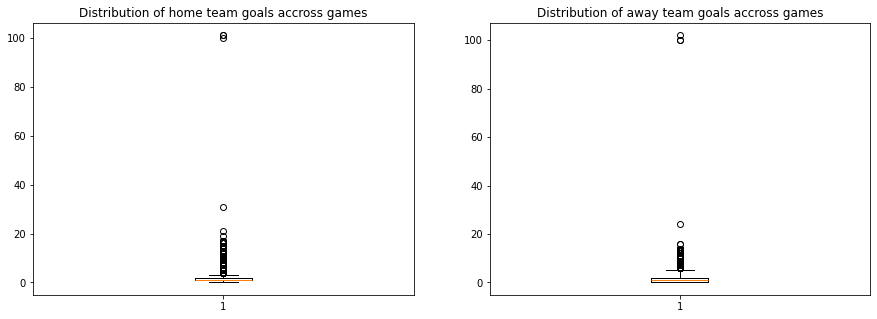

In [5]:
fig,(ax1,ax2) = pl.subplots(1,2, figsize=(15,5))

ax1.boxplot(list(Closing_Odds['home_score']))
ax2.boxplot(list(Closing_Odds['away_score']))

ax1.set_title('Distribution of home team goals accross games')
ax2.set_title('Distribution of away team goals accross games')

pl.show()

Well well well, 100 goals scored in one game, better check that out.

In [6]:
Closing_Odds[Closing_Odds['home_score']>30]

match_id                    league  match_date     home_team  \
10773     196028  Mexico: Primera Division  2005-08-13        Necaxa   
60099     293927    Peru: Primera Division  2007-08-26  Alianza Atl.   
97404     362716   France: Coupe de France  2008-11-22      Haguenau   
280577    617953     Romania: Romanian Cup  2012-08-28       Berceni   

        home_score        away_team  away_score  result  goal_difference  \
10773          101  U.N.A.M.- Pumas           0       1              101   
60099          101     Sport Ancash           1       1              100   
97404          100            Dijon         102      -1               -2   
280577          31  Academica Arges           0       1               31   

        avg_odds_home_win  ...  avg_odds_away_win  max_odds_home_win  \
10773              2.1433  ...             2.9033               2.20   
60099              1.9244  ...             3.4478               2.00   
97404              7.9891  ...             1.3536               9.00   
280577             1.7300  ...             3.7500               1.73   

        max_odds_draw  max_odds_away_win  top_bookie_home_win top_bookie_draw  \
10773            3.30               3.00               Expekt    William Hill   
60099            3.20               3.50                 bwin     bet-at-home   
97404            4.00               1.37              Betclic     bet-at-home   
280577           3.75               3.75          Paddy Power     Paddy Power   

       top_bookie_away_win n_odds_home_win  n_odds_draw  n_odds_away_win  
10773               bet365               6            6                6  
60099               bet365               9            9                9  
97404               Expekt              11           11               11  
280577         Paddy Power               1            1                1  

[4 rows x 21 columns]

In [7]:
Closing_Odds[Closing_Odds['away_score']>20]

match_id                     league  match_date   home_team  \
30817     236985     Peru: Primera Division  2006-05-24  FBC Melgar   
97404     362716    France: Coupe de France  2008-11-22    Haguenau   
97409     362731    France: Coupe de France  2008-11-22  Saint-Omer   
250126    579115  South Africa: Nedbank Cup  2012-03-04  Powerlines   

        home_score          away_team  away_score  result  goal_difference  \
30817            1        Jose Galvez         100      -1              -99   
97404          100              Dijon         102      -1               -2   
97409            0             Amiens         100      -1             -100   
250126           0  Mamelodi Sundowns          24      -1              -24   

        avg_odds_home_win  ...  avg_odds_away_win  max_odds_home_win  \
30817              2.1000  ...             3.0000                2.1   
97404              7.9891  ...             1.3536                9.0   
97409             11.4489  ...             1.1700               14.0   
250126            17.7500  ...             1.1000               19.0   

        max_odds_draw  max_odds_away_win  top_bookie_home_win top_bookie_draw  \
30817             3.2               3.00               bet365          bet365   
97404             4.0               1.37              Betclic     bet-at-home   
97409             6.0               1.26              Betsafe          bet365   
250126            7.5               1.11          Sportingbet     Sportingbet   

       top_bookie_away_win n_odds_home_win  n_odds_draw  n_odds_away_win  
30817               bet365               1            1                1  
97404               Expekt              11           11               11  
97409                10Bet               9            9                9  
250126                bwin               4            4                4  

[4 rows x 21 columns]

After review :
- Necaxa - U.N.A.M. ended 2-0, 
- Alianza Atl. - Sport Ancash ended on a 1-1
- Haguenau - Dijon ended in a 0-1
- Berceni - Academica Arges really ended 31-0

- FBC Melgar - Jose Galvez ended on a 2-0
- Saint-Omer - Amiens ended 1-0
- Powerlines - Mamelodi Sundowns really ended 0-24

Let's correct the dataset's mistake and go from there

In [8]:
Closing_Odds.loc[10773,'home_score']=2
Closing_Odds.loc[10773,'away_score']=0

Closing_Odds.loc[60099,'home_score']=1
Closing_Odds.loc[60099,'away_score']=1

Closing_Odds.loc[97404,'home_score']=0
Closing_Odds.loc[97404,'away_score']=1

Closing_Odds.loc[30817,'home_score']=2
Closing_Odds.loc[30817,'away_score']=0

Closing_Odds.loc[97409,'home_score']=1
Closing_Odds.loc[97409,'away_score']=0

#Update result column
result_col = 1 * (Closing_Odds['home_score'] > Closing_Odds['away_score']) \
       - 1 * (Closing_Odds['home_score'] < Closing_Odds['away_score'])

Closing_Odds['result'] = result_col

In [9]:
X = range(max(Closing_Odds["home_score"]))
YH = []
YA = []

for x in X: 
    YH.append(len(Closing_Odds[Closing_Odds["home_score"]==x]))
    
for x in X:    
    YA.append(len(Closing_Odds[Closing_Odds["away_score"]==x])) 
 

fig,(ax1,ax2) = pl.subplots(1,2, figsize=(20,5))

ax1.bar(X,YH)
ax1.set_xlabel('Goals scored by home team')
ax1.set_ylabel('N of games')
ax2.bar(X,YA)
ax2.set_xlabel('Goals scored by away team')

pl.show()

print(f" Home teams score {round(np.mean(Closing_Odds['home_score']),3)} goals on average, while away teams only score {round(np.mean(Closing_Odds['away_score']),3)}")

 Home teams score 1.538 goals on average, while away teams only score 1.2


#### - Year to year analysis : distribution of bets placed per year, and increase of competition in bookmakers

In [10]:
YEAR = []
for date in list(Closing_Odds["match_date"]):
   YEAR.append(int(date[:4]))

Closing_Odds.insert(3,'year',YEAR)

In [11]:
X = range(2005,2016)
Y1 = []
Y2 = []

for x in X:
    
    yearly_df = Closing_Odds[Closing_Odds["year"]==x]
    
    Y1.append(len(yearly_df))
    Y2.append(np.mean(yearly_df['n_odds_home_win'])) #Same averages for H/D/A in number of odds available.

fig,(ax1,ax2) = pl.subplots(1,2, figsize=(15,5))

fig.suptitle("Impact of years on number of games and betting companies")
ax1.bar(X,Y1)
ax1.set_ylabel("Total number of games")
ax1.set_xlabel("Year")

ax2.plot(X,Y2)
ax2.set_ylabel("Average number of odds proposed per game")
ax2.set_xlabel("Year")
pl.show()

Important to keep in mind : we have more games available in 2012 2013 and 2014 than any other years, by quite a large margin. 2005 to 2008 and 2015 are less filled.

Also, as we expected, there is an increase in odds available to chose from as years progress. Let's see if competition has an impact on those numbers.

#### - Betting companies : who's the most advantageous to bet on ? The least ?

Before looking at games with high amount of odds available and selecting the best one, we should look at the number of games with no bets available for one or more outcomes. Because it might give us some problem down the road.

In [46]:
pd.concat([Closing_Odds[Closing_Odds["n_odds_home_win"]==0],Closing_Odds[Closing_Odds["n_odds_away_win"]==0]]).head()

match_id         country                               league  \
7761      188788       Singapore                  Singapore: S-League   
7762      188789       Singapore                  Singapore: S-League   
9140      192445       Singapore                  Singapore: S-League   
234040    559175         Denmark       Denmark: Elitedivisionen Women   
243382    570692           World           World: Olympic Games Women   
243441    570761           World           World: Olympic Games Women   
277039    613589          Europe       Europe: Champions League Women   
293794    634357          Europe               Europe: Euro U19 Women   
294210    634820          Europe               Europe: Euro U19 Women   
298405    639992  Czech Republic   Czech Republic: First League Women   
300289    642377            Asia  Asia: East Asian Championship Women   
315968    661133         Germany             Germany: Oberliga Bremen   
318728    664549  Czech Republic   Czech Republic: First League Women   
334574    684147            Asia                Asia: Asian Cup Women   
336457    686533          Norway             Norway: Norway Cup Women   
341064    692045       Australia   Australia: Queensland State League   
343686    695103          Europe               Europe: Euro U17 Women   
353742    707950         Denmark       Denmark: Elitedivisionen Women   
354390    708766          Europe               Europe: Euro U19 Women   
359494    715580            Asia           Asia: AFC Championship U19   
379850    743089       Australia     Australia: National Youth League   
387844    753694  Czech Republic   Czech Republic: First League Women   
408957    783372           World                 World: Club Friendly   
422310    800849          Europe               Europe: Euro U19 Women   
422321    800864          Europe               Europe: Euro U19 Women   
425824    805571         Denmark       Denmark: Elitedivisionen Women   
453329    841577         Denmark       Denmark: Elitedivisionen Women   
479332    876673           World                 World: Club Friendly   
243054    570308           World           World: Olympic Games Women   
256289    587118          Europe                   Europe: EURO Women   
276278    612643         Denmark       Denmark: Elitedivisionen Women   
293796    634359          Europe               Europe: Euro U19 Women   
293802    634368          Europe               Europe: Euro U19 Women   
304470    647434           Spain               Spain: Superliga Women   
313966    658701         Finland                  Finland: Suomen Cup   
316630    661984           Spain               Spain: Superliga Women   
331286    680053            Asia                 Asia: Presidents Cup   
334433    683987            Asia                Asia: Asian Cup Women   
334575    684148            Asia                Asia: Asian Cup Women   
336369    686425          Norway             Norway: Norway Cup Women   
336370    686426          Norway             Norway: Norway Cup Women   
336453    686528          Norway             Norway: Norway Cup Women   
336456    686532          Norway             Norway: Norway Cup Women   
337901    688350           World                 World: Club Friendly   
353712    707904            Asia           Asia: AFF Championship U19   
358110    713690            Asia           Asia: AFC Championship U19   
405497    778694          Norway             Norway: Norway Cup Women   
406758    780600           World                 World: Club Friendly   
423646    802599     Switzerland               Switzerland: Swiss Cup   
439734    823887         Denmark       Denmark: Elitedivisionen Women   
440245    824542          France             France: Division 1 Women   
445512    831339          France             France: Division 1 Women   

        match_date  year             home_team  home_score  \
7761    2005-05-19  2005              Home Utd           0   
7762    2005-0

Games in which there are no odds for Home or Away Teams are very one-sided (so much that a 1.01 odd would still be losing money so better not propose at all). It's a little work around for our data analysis purposes but these games are still valuable and can't be deleted without care. Plus, it's probably an easy prediction to land for our future model. There are 28 instances of 0 bets for H, and 24 for A (none for Draw, you can always bet on draw, what a way to live life)

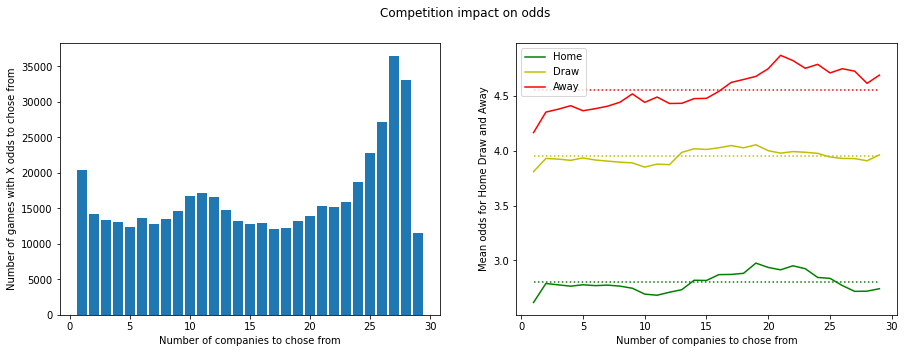

In [13]:
X = list(set(list(Closing_Odds["n_odds_home_win"])))
X=X[1:]
#Delete the 'NaN' occurences when no odds are available for a bet and we get the 29 bookmakers like advertised

Y=[]

H,D,A=[],[],[]
for x in X:
    Competition_df = Closing_Odds[Closing_Odds["n_odds_home_win"]==x]
    Y.append(len(Competition_df)) #Number of games played with X amount of odds to chose from 
    H.append(np.mean(Competition_df['max_odds_home_win'])) #Average odd for Home team Win per number of odds to choose from
    D.append(np.mean(Competition_df['max_odds_draw']))#-------------------- Draw ------------------------------------------
    A.append(np.mean(Competition_df['max_odds_away_win'])) #--------------- Away ------------------------------------------

    
    
fig,(ax1,ax2) = pl.subplots(1,2, figsize=(15,5))
fig.suptitle("Competition impact on odds")

ax1.bar(X,Y)
ax1.set_ylabel("Number of games with X odds to chose from")
ax1.set_xlabel("Number of companies to chose from")

ax2.plot(X,H,c="g", label="Home")
ax2.plot(X,D,c="y", label="Draw")
ax2.plot(X,A,c="r", label="Away")

ax2.hlines(np.mean(H),1,len(X),color='g',linestyle='dotted')
ax2.hlines(np.mean(D),1,len(X),color='y',linestyle='dotted')
ax2.hlines(np.mean(A),1,len(X),color='r',linestyle='dotted')


ax2.set_ylabel("Mean odds for Home Draw and Away")
ax2.set_xlabel("Number of companies to chose from")
ax2.legend()

pl.show()

Most games we collected have between 2 and 23 odds to chose from. Still, we've got plenty of games with 25 odds or more, which is a consequence of the 2 previous graphs we outlined : an increase of games played in 2013+ in our dataset, and the rise in betting companies accross time.

On the second graph, we observe no noticeable change for Home team and Draws, but a slight increase in odds for Away teams as competition rises. That's understandable, the best way for betting companies to separate themselves is by increasing odds of outcomes they deem unlikely, so their bigger numbers attract more clients while still keeping their profit margins relatively untouched.

Now we shall compare bookmakers numbers. Who gives us the best odds the most often ? Who's tightfisted ? 

In [14]:
Bookies = list(set(list(Closing_Odds["top_bookie_home_win"])+list(Closing_Odds["top_bookie_draw"])+list(Closing_Odds["top_bookie_away_win"])))
Bookies=Bookies[1:]



H,D,A=[],[],[]

for bm in Bookies:
    
    H.append(len(Closing_Odds[Closing_Odds["top_bookie_home_win"]==bm]))
    D.append(len(Closing_Odds[Closing_Odds["top_bookie_draw"]==bm]))
    A.append(len(Closing_Odds[Closing_Odds["top_bookie_away_win"]==bm]))

Best_H_BM = {}
Best_D_BM = {}
Best_A_BM = {}
Best_BM = {}

for i in range(len(Bookies)):
    
    Best_H_BM[Bookies[i]] = H[i]
    Best_D_BM[Bookies[i]] = D[i]
    Best_A_BM[Bookies[i]] = A[i]
    Best_BM[Bookies[i]] = H[i]+D[i]+A[i]
    


In [15]:
print("Best Bookmakers : ",sorted(Best_BM.items(), key=lambda x: x[1], reverse=True))
#print("Worst Bookmakers : ",sorted(Best_BM.items(), key=lambda x: x[1], reverse=False))

Best Bookmakers :  [('Pinnacle Sports', 202774), ('bet365', 182756), ('bwin', 131318), ('BetVictor', 91718), ('188BET', 83500), ('10Bet', 65051), ('Sportingbet', 59795), ('Expekt', 52418), ('Betsafe', 50107), ('bet-at-home', 47068), ('12BET', 45146), ('888sport', 41395), ('Tipico', 41160), ('Betway', 33553), ('SBOBET', 32219), ('Paddy Power', 29543), ('Coral', 27143), ('Betclic', 26871), ('Interwetten', 26765), ('Ladbrokes', 23577), ('Unibet', 23388), ('Betsson', 23190), ('William Hill', 23127), ('myBet', 22378), ('DOXXbet', 16224), ('ComeOn', 12172), ('Titanbet', 9503), ('youwin', 8015), ('Jetbull', 6394)]


Pinnacle Sports is the uncontested best bookmaker on the market. In ~480,000 games (meaning ~1,200,000 Odds to chose from), they have one of the best odds 200,000 times. This is quite impressive. 

#### - Geographical data : Where are our games played ? What leagues / countries are the most involved ? Does it have an impact on odds, or results ?

In [16]:
Countries_dict = {}
Leagues_dict = {}

Countries_list = []
Leagues_list = []

for league in list(Closing_Odds["league"]):

    country = league.split(": ")[0]
    Countries_list.append(country)
    Leagues_list.append(league)
    
    if country in Countries_dict:
        Countries_dict[country]+=1
    else:
        Countries_dict[country]=1
        
    if league in Leagues_dict:
        Leagues_dict[league]+=1
    else:
        Leagues_dict[league]=1
        

print(f"{len(Closing_Odds)} games")
print(f"{len(set(Closing_Odds['league']))} different leagues")
print(f"{len(Countries_dict)} different countries")


479440 games
818 different leagues
129 different countries


In [17]:
sorted(Countries_dict.items(), key=lambda x: x[1], reverse=True)[:15]

[('England', 45000),
 ('Germany', 32037),
 ('World', 24402),
 ('Italy', 21920),
 ('Spain', 19171),
 ('Turkey', 14196),
 ('France', 14070),
 ('Europe', 12998),
 ('Norway', 11655),
 ('Russia', 11060),
 ('Denmark', 9752),
 ('Czech Republic', 9002),
 ('Scotland', 8946),
 ('Belgium', 8941),
 ('Austria', 8733)]

In [18]:
sorted(Leagues_dict.items(), key=lambda x: x[1], reverse=True)[:15]

[('World: Club Friendly', 14106),
 ('England: League Two', 5283),
 ('England: League One', 5277),
 ('England: Championship', 5260),
 ('World: Friendly International', 5105),
 ('Italy: Serie B', 4481),
 ('Spain: Segunda Division', 4439),
 ('Argentina: Primera Division', 4024),
 ('Netherlands: Eerste Divisie', 3772),
 ('Italy: Serie A', 3643),
 ('Chile: Primera Division', 3637),
 ('Spain: Primera Division', 3630),
 ('France: Ligue 1', 3609),
 ('France: Ligue 2', 3608),
 ('England: Premier League', 3602)]

We have a huge focus on english football, with 45,000 games to chose from. Second is Germany, with ~32,000 and then there is a big drop, with World, Italy, Spain and France all below 24,000, almost half the amount of English games. 

In terms of leagues, what we have most of is world friendlies. 

I thought it would be beneficial to separate the league column into the 2 separate entities country & league alone, but it wouldn't tell the full story, as some countries have the same league names. For example, almost every spanish speaking country's first division is called 'Primera Division'.
So I will add a country column, just to get the information more accessible, but keep the league column as is.

In [19]:
Closing_Odds.insert(1,'country',Countries_list)

#### - Team's perspective 

For this part I chose chose Chelsea, because I happen to be a fan. 

In [20]:
CHE_H = Closing_Odds[Closing_Odds["home_team"]=="Chelsea"]
CHE_A = Closing_Odds[Closing_Odds["away_team"]=="Chelsea"]
CHE_Odds = pd.concat([CHE_H,CHE_A]).sort_values("match_id").reset_index(drop=True)

CHE_Odds

match_id  country                   league  match_date  year  \
0      170088  England  England: Premier League  2005-01-01  2005   
1      170331  England  England: Premier League  2005-01-04  2005   
2      170559  England          England: FA Cup  2005-01-08  2005   
3      170902  England     England: Carling Cup  2005-01-12  2005   
4      171044  England  England: Premier League  2005-01-15  2005   
..        ...      ...                      ...         ...   ...   
612    866194  England  England: Premier League  2015-05-10  2015   
613    869186  England  England: Premier League  2015-05-18  2015   
614    870752  England  England: Premier League  2015-05-24  2015   
615    872273    World     World: Club Friendly  2015-05-30  2015   
616    872925    World     World: Club Friendly  2015-06-02  2015   

          home_team  home_score          away_team  away_score  result  ...  \
0         Liverpool           0            Chelsea           1      -1  ...   
1           Chelsea           2      Middlesbrough           0       1  ...   
2           Chelsea           3         Scunthorpe           1       1  ...   
3           Chelsea           0  Manchester United           0       0  ...   
4         Tottenham           0            Chelsea           2      -1  ...   
..              ...         ...                ...         ...     ...  ...   
612         Chelsea           1          Liverpool           1       0  ...   
613       West Brom           3            Chelsea           0       1  ...   
614         Chelsea           3         Sunderland           1       1  ...   
615  Thailand Stars           0            Chelsea           1      -1  ...   
616       Sydney FC           0            Chelsea           1      -1  ...   

     avg_odds_away_win  max_odds_home_win  max_odds_draw  max_odds_away_win  \
0               2.2256               3.20           3.25               2.29   
1               8.7211               1.36           5.00               9.99   
2               9.9900               1.06           9.50               9.99   
3               4.3744               1.73           3.75               5.00   
4               1.8120               4.65           3.40               1.87   
..                 ...                ...            ...                ...   
612             3.5893               2.20           3.50               3.85   
613             1.7114               5.56           3.95               1.80   
614            10.4062               1.33           6.25              13.00   
615             1.2018              13.00           7.35               1.25   
616             1.4471               7.56           5.02               1.55   

     top_bookie_home_win  top_bookie_draw  top_bookie_away_win  \
0            Paddy Power      Sportingbet               Expekt   
1                 bet365           Expekt               Expekt   
2              Ladbrokes  Pinnacle Sports          bet-at-home   
3                  Coral        Ladbrokes               bet365   
4                 Expekt      Sportingbet      Pinnacle Sports   
..                   ...              ...                  ...   
612             888sport            myBet              Betsafe   
613      Pinnacle Sports  Pinnacle Sports          Interwetten   
614                 bwin        BetVictor          Sportingbet   
615      Pinnacle Sports  Pinnacle Sports               188BET   
616      Pinnacle Sports  Pinnacle Sports          Interwetten   

    n_odds_home_win n_odds_draw n_odds_away_win  
0                 9           9               9  
1                 9           9               9  
2                 9           9               9  
3                 9           9               9  
4                10          10              10  
..              ...         ...             ...  
612              29          29              29  
613              29          29              29  
614              29          29    

In [21]:
fig, ax = pl.subplots(1, 3, figsize=(15, 5))
#ax.set_ylabel('Odds when Chelsea is the Home Team')
fig.suptitle("Odds for Chelsea Home games")

ax[0].boxplot(list(CHE_H['avg_odds_home_win']))
ax[0].set_xlabel('Win')
ax[1].boxplot(list(CHE_H['avg_odds_draw']))
ax[1].set_xlabel('Draw')
ax[2].boxplot(list(CHE_H['avg_odds_away_win']))
ax[2].set_xlabel('Lose')

pl.show()

In [22]:
fig, ax = pl.subplots(1, 3, figsize=(15, 5))
#ax.set_ylabel('Odds when Chelsea is the Home Team')
fig.suptitle("Odds for Chelsea Away games")

ax[0].boxplot(list(CHE_A['avg_odds_away_win']))
ax[0].set_xlabel('Win')
ax[1].boxplot(list(CHE_A['avg_odds_draw']))
ax[1].set_xlabel('Draw')
ax[2].boxplot(list(CHE_A['avg_odds_home_win']))
ax[2].set_xlabel('Lose')

pl.show()

Chelsea being a good team (especially in the 2005-15 decade), their winning odds are low. Overall, their odds for winning go from 1.05 at home against Macclesfield in 2007, to 10.47 away at Camp Nou in 2012 (legendary game and understandable odds all things considered).

### II - Introduction of the paper's strategy :

#### Formula (Eq7) :  max(Ω) > 1/pcons - α <=> (1/avg(Ω) - α)*max(Ω) -1 > 0


(If at least 3 odds available, else do not bet)

In [ ]:
alpha = 0.05

In [24]:
Home_condition = ((1/Closing_Odds['avg_odds_home_win']-alpha)*Closing_Odds['max_odds_home_win']-1>0) & (Closing_Odds['n_odds_home_win']>3)

Draw_condition = ((1/Closing_Odds['avg_odds_draw']-alpha)*Closing_Odds['max_odds_draw']-1>0) & (Closing_Odds['n_odds_draw']>3)

Away_condition = ((1/Closing_Odds['avg_odds_away_win']-alpha)*Closing_Odds['max_odds_away_win']-1>0) & (Closing_Odds['n_odds_away_win']>3)

In [25]:
#print(100*sum(Home_condition)/len(Closing_Odds),
#      100*sum(Draw_condition)/len(Closing_Odds),
#      100*sum(Away_condition)/len(Closing_Odds))

Condition = Home_condition|Draw_condition|Away_condition

print(100*sum(Condition)/len(Closing_Odds),"% of our games are eligible for our betting strategy")

11.771024528616719 % of games are eligible for our betting strategy


In [26]:
Closing_Odds['condition']=Condition
Closing_Odds

match_id  country                   league  match_date  year  \
0         170088  England  England: Premier League  2005-01-01  2005   
1         170089  England  England: Premier League  2005-01-01  2005   
2         170090  England  England: Premier League  2005-01-01  2005   
3         170091  England  England: Premier League  2005-01-01  2005   
4         170092  England  England: Premier League  2005-01-01  2005   
...          ...      ...                      ...         ...   ...   
479435    876806    World     World: Club Friendly  2015-06-30  2015   
479436    876807    World     World: Club Friendly  2015-06-30  2015   
479437    876808    World     World: Club Friendly  2015-06-30  2015   
479438    876809    World     World: Club Friendly  2015-06-30  2015   
479439    876812    World     World: Club Friendly  2015-06-30  2015   

           home_team  home_score          away_team  away_score  result  ...  \
0          Liverpool           0            Chelsea           1      -1  ...   
1             Fulham           3     Crystal Palace           1       1  ...   
2        Aston Villa           1          Blackburn           0       1  ...   
3             Bolton           1          West Brom           1       0  ...   
4           Charlton           1            Arsenal           3      -1  ...   
...              ...         ...                ...         ...     ...  ...   
479435    St. Gallen           1   Wacker Innsbruck           2      -1  ...   
479436  SW Harelbeke           1            Waregem           1       0  ...   
479437       Torhout           0        Club Brugge           5      -1  ...   
479438       Tournai           0  Mouscron Peruwelz           3      -1  ...   
479439         Zavrc           0         Istra 1961           0       0  ...   

        max_odds_home_win  max_odds_draw  max_odds_away_win  \
0                    3.20           3.25               2.29   
1                    2.04           3.30               4.15   
2                    2.00           3.40               4.50   
3                    1.67           3.57               6.27   
4                    7.00           3.60               1.62   
...                   ...            ...                ...   
479435               1.83           4.20               4.33   
479436              19.00           9.00               1.13   
479437              22.00          15.00               1.05   
479438              34.00          12.00               1.10   
479439               5.46           4.25               1.70   

        top_bookie_home_win  top_bookie_draw  top_bookie_away_win  \
0               Paddy Power      Sportingbet               Expekt   
1           Pinnacle Sports      bet-at-home               Expekt   
2           Pinnacle Sports      Paddy Power          Sportingbet   
3                     Coral  Pinnacle Sports      Pinnacle Sports   
4                    Expekt      Paddy Power               bet365   
...                     ...              ...                  ...   
479435               188BET           bet365            Ladbrokes   
479436            BetVictor           bet365             Titanbet   
479437            BetVictor          Jetbull            BetVictor   
479438          Sportingbet          Betclic          Paddy Power   
479439      Pinnacle Sports         888sport            Ladbrokes   

        n_odds_home_win n_odds_draw n_odds_away_win condition  
0                     9           9               9     False  
1                     9           9               9     False  
2                     9           9               9     False  
3                     9           9               9     False  
4                     9           9               9     False  
...                 ...         ...             ...       ...  
479435               24          24              24     False  
479436               17          17              17     False  
479437              

#### Before we dive into model prediction, let's do another round of analysis, this time with the label, so we know where to look at when predicting the games to bet on. Do they have things in common an AI model can detect ?

In [27]:
X = list(Countries_dict)
Y={}

for country in X:
    country_df = Closing_Odds[Closing_Odds['country']==country]
    
    Y[country]= round(100*len(country_df[country_df['condition']==True])/len(country_df),2)

    
print("Best countries to bet on :",sorted(Y.items(), key=lambda x: x[1], reverse=True)[:10])

print("Worst countries to bet on :",sorted(Y.items(), key=lambda x: x[1], reverse=False)[:10])

#print("Average % :",np.mean(list(Y.values())))

Best countries to bet on : [('Canada', 30.47), ('North &amp; Central America', 27.6), ('New Zealand', 24.73), ('Hong Kong', 22.85), ('South Korea', 21.54), ('China', 20.75), ('Indonesia', 20.48), ('Morocco', 20.07), ('Argentina', 20.04), ('Cyprus', 19.41)]
Worst countries to bet on : [('Serbia and Montenegro', 0.0), ('Nigeria', 0.0), ('Syria', 0.0), ('Sudan', 0.0), ('Lebanon', 0.0), ('Andorra', 0.0), ('Trinidad and Tobago', 0.0), ('Gambia', 0.0), ('Bangladesh', 0.0), ('Botswana', 0.0)]


In [28]:
X = list(Leagues_dict)
Y={}

for league in X:
    league_df = Closing_Odds[Closing_Odds['league']==league]
    
    Y[league] = round(100*len(league_df[league_df['condition']==True])/len(league_df),2)
#print(Y)

    
print("Best leagues to bet on :",sorted(Y.items(), key=lambda x: x[1], reverse=True)[:10])

print("Worst leagues to bet on :",sorted(Y.items(), key=lambda x: x[1], reverse=False)[:10])

#print("Average % :",np.mean(list(Y.values())))

Best leagues to bet on : [('World: Wembley Cup', 100.0), ('Europe: Baltic Cup U21', 100.0), ('World: Brussels Tournament', 100.0), ('FYR of Macedonia: Super Cup', 100.0), ('United Arab Emirates: Super Cup', 100.0), ('World: Kirin Cup (Japan)', 66.67), ('Germany: Telekom Cup', 62.5), ('South America: Copa Bandes', 62.5), ('Ukraine: Super Cup', 60.0), ('Belarus: Super Cup', 60.0)]
Worst leagues to bet on : [('England: LDV Vans Trophy', 0.0), ('Denmark: 2nd Division', 0.0), ('Serbia and Montenegro: Prva liga', 0.0), ('Portugal: Super Cup', 0.0), ('Netherlands: Super Cup', 0.0), ('Bulgaria: B PFG East', 0.0), ('Bulgaria: B PFG West', 0.0), ('Europe: Radyospor Cup', 0.0), ('Europe: International Tournament (Cyprus)', 0.0), ('World: Pan-Pacific Championship', 0.0)]


Due to the low sample sizes on a lot of leagues, we have big discrepencies. Some have all of their games eligible for our strategy while some have none. It isn't a problem in the end, we just have to hope our model takes advantage of this

What about what years contain most games worth betting on ?

In [29]:
X = range(2005,2016)
Y=[]

for year in X:
    year_df = Closing_Odds[Closing_Odds['year']==year]
    
    Y.append(100*len(year_df[year_df['condition']==True])/len(year_df))
#print(Y)
pl.bar(list(X),Y)
pl.show()

22.4% of 2008 games are worth betting on following our strategy. That's a huge bump from all other years, all close to the average 11.7% except for 2009 at 15%. This is quite suprising, since most of 2008-09 games have little betting odds to chose from, and we just saw a correlation between our condition and n_odds. We shall go to the bottom of it.

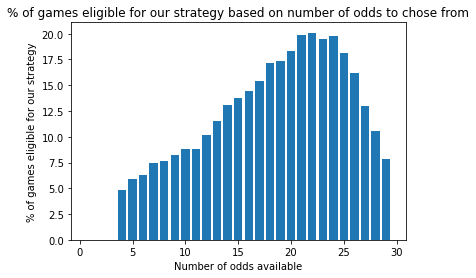

In [30]:
X = range(1,30)
Y=[]

for n_odds in X:
    n_odds_df = Closing_Odds[Closing_Odds['n_odds_home_win']==n_odds]
    
    Y.append(100*len(n_odds_df[n_odds_df['condition']==True])/len(n_odds_df))
#print(Y)
pl.bar(list(X),Y)
pl.ylabel('% of games eligible for our strategy')
pl.xlabel('Number of odds available')

pl.title("% of games eligible for our strategy based on number of odds to chose from")
pl.show()

The sweet spot for n_odds is around 21 to 25 different bookmakers. It's a straight line from lower number of choice to this threshold. After 25, the data is less relevant because games having more than 25 bookmakers to pick from are those played in 2015, which we have little of.

### Feature engineering

Since most of our data's columns are unusabe for future sample (due to unknown results and odds), we have to find new ways to circumvent this problem. One way is to create new features based on our existing ones, that we can use for both training and testing examples. 

I will introduce 3 new features : 
- home team's winrate in their last 5 games
- away team's winrate in their last 5 games
- head to head between the 2 opposing teams

In [31]:
def home_team_last_5_wr(df):

    last_5_wr = []

    # Dictionary to track the last 5 games of each home team
    team_history = {}

    for _, row in df.iterrows():
        home_team = row['home_team']
        result = row['result']

        # Initialize team history if not present
        if home_team not in team_history:
            team_history[home_team] = []

        # Calculate win rate for the last 5 games
        recent_results = team_history[home_team]
        if len(recent_results) > 0:
            wr = sum(recent_results) / len(recent_results)
            #wr = recent_results.count(1) / len(recent_results)
            '''   
            Different things measured by different winrates.
            Here I've chosen to compute losses as -1 instead of 0 (that would be the second line)
            to gather more informations about teams' recent form
            '''     
        else:
            wr = 0
        last_5_wr.append(wr)

        # Update the team's history with the current game result
        if len(recent_results) == 5:
            recent_results.pop(0)  # Remove the oldest result
        recent_results.append(result)

    return pd.Series(last_5_wr, name='home_last_5_wr')

Last_5_H_WR = home_team_last_5_wr(Closing_Odds)
#Last_5_H_WR

In [32]:
def away_team_last_5_wr(df):

    last_5_wr = []

    # Dictionary to track the last 5 games of each team
    team_history = {}

    for _, row in df.iterrows():
        away_team = row['away_team']
        result = row['result']

        # Initialize team history if not present
        if away_team not in team_history:
            team_history[away_team] = []

        # Calculate win rate for the last 5 games
        recent_results = team_history[away_team]
        if len(recent_results) > 0:
            wr = sum(recent_results) / len(recent_results)
            
        else:
            wr = 0
        last_5_wr.append(wr)

        if len(recent_results) == 5:
            recent_results.pop(0)  
        recent_results.append(result)

    return pd.Series(last_5_wr, name='away_last_5_wr')

Last_5_A_WR = away_team_last_5_wr(Closing_Odds)
#Last_5_A_WR

In [33]:
Closing_Odds.insert(11,'home_last_5_wr',Last_5_H_WR)
Closing_Odds.insert(12,'away_last_5_wr',Last_5_A_WR)
Closing_Odds

match_id  country                   league  match_date  year  \
0         170088  England  England: Premier League  2005-01-01  2005   
1         170089  England  England: Premier League  2005-01-01  2005   
2         170090  England  England: Premier League  2005-01-01  2005   
3         170091  England  England: Premier League  2005-01-01  2005   
4         170092  England  England: Premier League  2005-01-01  2005   
...          ...      ...                      ...         ...   ...   
479435    876806    World     World: Club Friendly  2015-06-30  2015   
479436    876807    World     World: Club Friendly  2015-06-30  2015   
479437    876808    World     World: Club Friendly  2015-06-30  2015   
479438    876809    World     World: Club Friendly  2015-06-30  2015   
479439    876812    World     World: Club Friendly  2015-06-30  2015   

           home_team  home_score          away_team  away_score  result  ...  \
0          Liverpool           0            Chelsea           1      -1  ...   
1             Fulham           3     Crystal Palace           1       1  ...   
2        Aston Villa           1          Blackburn           0       1  ...   
3             Bolton           1          West Brom           1       0  ...   
4           Charlton           1            Arsenal           3      -1  ...   
...              ...         ...                ...         ...     ...  ...   
479435    St. Gallen           1   Wacker Innsbruck           2      -1  ...   
479436  SW Harelbeke           1            Waregem           1       0  ...   
479437       Torhout           0        Club Brugge           5      -1  ...   
479438       Tournai           0  Mouscron Peruwelz           3      -1  ...   
479439         Zavrc           0         Istra 1961           0       0  ...   

        max_odds_home_win  max_odds_draw  max_odds_away_win  \
0                    3.20           3.25               2.29   
1                    2.04           3.30               4.15   
2                    2.00           3.40               4.50   
3                    1.67           3.57               6.27   
4                    7.00           3.60               1.62   
...                   ...            ...                ...   
479435               1.83           4.20               4.33   
479436              19.00           9.00               1.13   
479437              22.00          15.00               1.05   
479438              34.00          12.00               1.10   
479439               5.46           4.25               1.70   

        top_bookie_home_win  top_bookie_draw  top_bookie_away_win  \
0               Paddy Power      Sportingbet               Expekt   
1           Pinnacle Sports      bet-at-home               Expekt   
2           Pinnacle Sports      Paddy Power          Sportingbet   
3                     Coral  Pinnacle Sports      Pinnacle Sports   
4                    Expekt      Paddy Power               bet365   
...                     ...              ...                  ...   
479435               188BET           bet365            Ladbrokes   
479436            BetVictor           bet365             Titanbet   
479437            BetVictor          Jetbull            BetVictor   
479438          Sportingbet          Betclic          Paddy Power   
479439      Pinnacle Sports         888sport            Ladbrokes   

        n_odds_home_win  n_odds_draw  n_odds_away_win condition  
0                     9            9                9     False  
1                     9            9                9     False  
2                     9            9                9     False  
3                     9            9                9     False  
4                     9            9                9     False  
...                 ...          ...              ...       ...  
479435               24           24               24     False  
479436               17           17               17     False  
47

When it comes to the Head to Head feature, there are many ways we could go about it, as there are a lot of ways to calculate head to head between Team A vs Team B:
- consider every game between A and B regardless of who's at home/away
- only consider the games where A is at home (if the current game under consideration is played with A at home)
- consider the last X games to weigh more heavily on current form
- take all games into account (as some teams have never won at in a certain stadium for a very long time it might have a bigger statistical impact)


For this use case, we probably could choose every other one, without much difference. 
I decided to filter past games on Home/Away (meaning if the game under consideration is A VS B, we don't compute B VS A past results to the H2H) but not on dates (meaning we take every past games and not only the last X).

In [34]:
def head_to_head_winrate(df):
 

    # Initialize a column to store the head-to-head win rate
    h2h_winrate = []

    # Dictionary to track the last 5 head-to-head results for each home-away team pair
    h2h_history = {}

    for _, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']
        result = row['result']

        # Create a unique key for the head-to-head pair
        matchup_key = (home_team, away_team)

        # Initialize head-to-head history if not present
        if matchup_key not in h2h_history:
            h2h_history[matchup_key] = []

        # Calculate win rate for the previous head-to-head games
        recent_results = h2h_history[matchup_key]
        if len(recent_results) > 0:
            winrate = sum(recent_results) / len(recent_results)
        else:
            winrate = 0
        
        # >0 winrate means the home team won more than it lost, <0 means the away team got the upper hand
        # thanks to our result column definition
        
        h2h_winrate.append(winrate)
        recent_results.append(result)

    # Add the calculated winrate as a new column in the DataFrame
    return pd.Series(h2h_winrate, name='HeadToHeadhomeWinRate')

Closing_Odds.insert(13,'head_to_head',head_to_head_winrate(Closing_Odds))
Closing_Odds

match_id  country                   league  match_date  year  \
0         170088  England  England: Premier League  2005-01-01  2005   
1         170089  England  England: Premier League  2005-01-01  2005   
2         170090  England  England: Premier League  2005-01-01  2005   
3         170091  England  England: Premier League  2005-01-01  2005   
4         170092  England  England: Premier League  2005-01-01  2005   
...          ...      ...                      ...         ...   ...   
479435    876806    World     World: Club Friendly  2015-06-30  2015   
479436    876807    World     World: Club Friendly  2015-06-30  2015   
479437    876808    World     World: Club Friendly  2015-06-30  2015   
479438    876809    World     World: Club Friendly  2015-06-30  2015   
479439    876812    World     World: Club Friendly  2015-06-30  2015   

           home_team  home_score          away_team  away_score  result  ...  \
0          Liverpool           0            Chelsea           1      -1  ...   
1             Fulham           3     Crystal Palace           1       1  ...   
2        Aston Villa           1          Blackburn           0       1  ...   
3             Bolton           1          West Brom           1       0  ...   
4           Charlton           1            Arsenal           3      -1  ...   
...              ...         ...                ...         ...     ...  ...   
479435    St. Gallen           1   Wacker Innsbruck           2      -1  ...   
479436  SW Harelbeke           1            Waregem           1       0  ...   
479437       Torhout           0        Club Brugge           5      -1  ...   
479438       Tournai           0  Mouscron Peruwelz           3      -1  ...   
479439         Zavrc           0         Istra 1961           0       0  ...   

        max_odds_home_win  max_odds_draw  max_odds_away_win  \
0                    3.20           3.25               2.29   
1                    2.04           3.30               4.15   
2                    2.00           3.40               4.50   
3                    1.67           3.57               6.27   
4                    7.00           3.60               1.62   
...                   ...            ...                ...   
479435               1.83           4.20               4.33   
479436              19.00           9.00               1.13   
479437              22.00          15.00               1.05   
479438              34.00          12.00               1.10   
479439               5.46           4.25               1.70   

        top_bookie_home_win  top_bookie_draw  top_bookie_away_win  \
0               Paddy Power      Sportingbet               Expekt   
1           Pinnacle Sports      bet-at-home               Expekt   
2           Pinnacle Sports      Paddy Power          Sportingbet   
3                     Coral  Pinnacle Sports      Pinnacle Sports   
4                    Expekt      Paddy Power               bet365   
...                     ...              ...                  ...   
479435               188BET           bet365            Ladbrokes   
479436            BetVictor           bet365             Titanbet   
479437            BetVictor          Jetbull            BetVictor   
479438          Sportingbet          Betclic          Paddy Power   
479439      Pinnacle Sports         888sport            Ladbrokes   

        n_odds_home_win  n_odds_draw  n_odds_away_win  condition  
0                     9            9                9      False  
1                     9            9                9      False  
2                     9            9                9      False  
3                     9            9                9      False  
4                     9            9                9      False  
...                 ...          ...              ...        ...  
479435               24           24               24      False  
479436               17           17               17      F

For a new engineered feature, we could convert the n_odds to a different meaning rendering it usesfull with our constraint.

We hypothesize that n_odds are most importantly a function of time and league, and we can predict a game's n_odds accurately enough based on previous n_odds from games played in the same league in the same year or season.

Let's map the std of n_odds in the PL based on seasons and test this hypothesis.

In [35]:
X = range(2005,2016)
Y=[]

for year in X:
    # Take games from 1st June of year X to 1st June of year X+1 in the PL
    # and map the deviation of n_odds (same averages for H/D/A)
    
    season_df = Closing_Odds[(Closing_Odds['match_date']>=f"{year-1}-06-01")&
                             (Closing_Odds['match_date']<=f"{year}-06-01")&
                             (Closing_Odds['league']=="England: Premier League")]
    Y.append(list(season_df['n_odds_draw']))

pl.boxplot(Y,labels=X)
pl.show()

#for k in Y:
#    print(np.std(k))

C:\Users\remib\AppData\Local\Temp/ipykernel_15984/3086775110.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pl.boxplot(Y,labels=X)


The results aren't decisive enough to conclude for me, the max span of data is quite high in some games. I could choose to go with it, but I am afraid the std isn't low enough. Plus, we only tried it on the PL, and we can't reallistically test it for all 800 leagues, so we should just forget about it and try other ideas.

Other candidates for new features included :
- home team last X goals scored/conceded/difference
- away team last X goals scored/conceded/difference
- team ranking accross leagues, although that would probably require a lot of time and energy, only to fall into the trap of playing into the bookmakers game the paper warned us about (which is to try to anticipate the result of a game ourselves)

#### Mapping catergorical data to numerical

Since more than half of our columns are categorical, we could simply transform some of our data to numerical so we can use them in our model.

In [36]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
Closing_Odds['country_encoded'] = encoder.fit_transform(Closing_Odds[['country']])
print(max(Closing_Odds['country_encoded']))

128.0


In [37]:
Closing_Odds['league_encoded'] = encoder.fit_transform(Closing_Odds[['league']])
print(max(Closing_Odds['league_encoded']))

817.0


In [38]:
bookies = set(Closing_Odds['top_bookie_home_win'])

bookie_to_number = {}
index=0
for bookie in bookies:
    bookie_to_number[bookie]=index
    index+=1

columns_to_map = ['top_bookie_home_win', 'top_bookie_draw', 'top_bookie_away_win']
Closing_Odds[columns_to_map] = Closing_Odds[columns_to_map].replace(bookie_to_number)

C:\Users\remib\AppData\Local\Temp/ipykernel_15984/3219918829.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Closing_Odds[columns_to_map] = Closing_Odds[columns_to_map].replace(bookie_to_number)


We fit countries, leagues and bookmakers to numbers going from 0-128, 0-817 and 0-29 respectively

It's now time to chose a model according to our use case and constraints, train it, evaluate it and report on the results.

## III - Model Choice

### Static vs Dynamic Classification strategies

#### 1 - Static  

The goal with this strategy is to train a model with data we know are anterior to our validation/test samples. That way we make sure we don't break the rules related to match dates.

We also only take into account features we can use both for training AND testing. Meaning we simply discard odds data, results, goal difference ...

It's a first approximation, we shall see whether or not to improve the model based on preliminary results, and find ways to include more data, or new ways of slicing data to mitigate issues and biases.

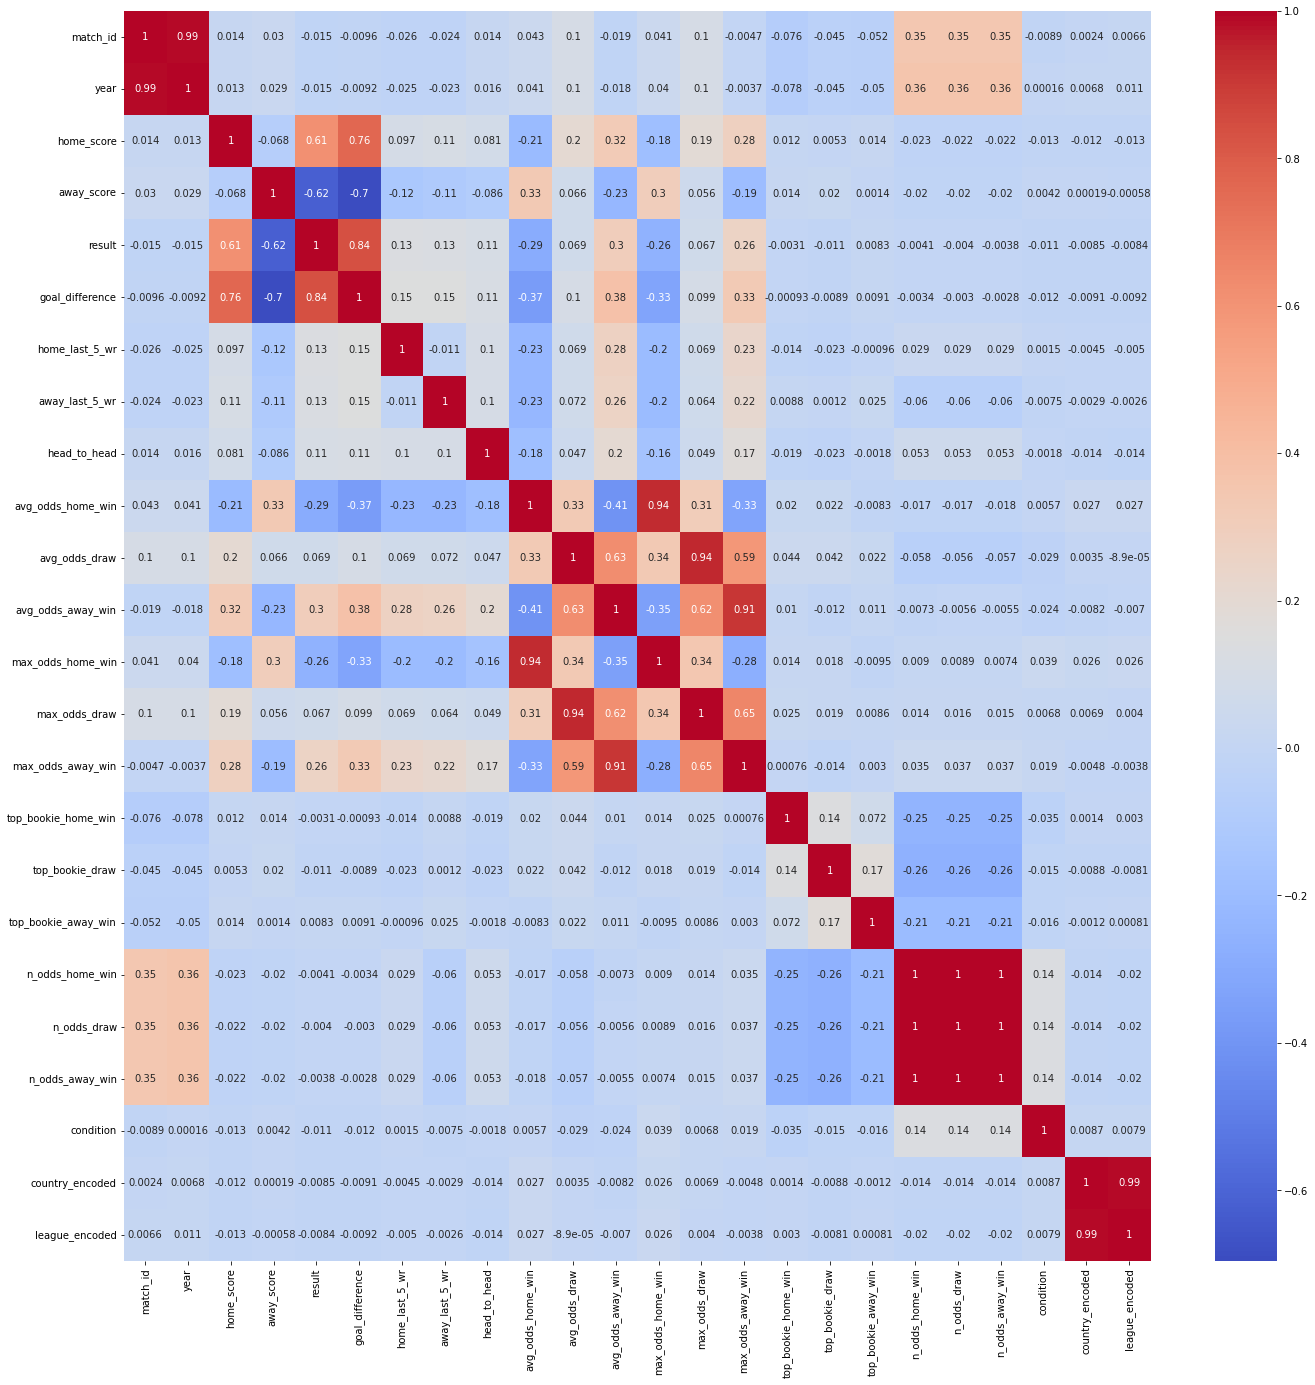

In [39]:
Numerical_data = Closing_Odds.drop(['match_date',"league","country","home_team","away_team"],axis=1)

pl.figure(figsize=(23,23))
sns.heatmap(Numerical_data.corr(), annot=True, cmap='coolwarm')
pl.show()

In [40]:
fixed_training_columns = ([ 'country_encoded', 'league_encoded',  'match_id','home_last_5_wr', 
                           'away_last_5_wr', 'head_to_head'])

AUC-ROC: 0.5202


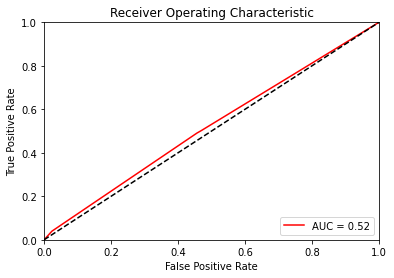

              precision    recall  f1-score   support

       False       0.90      0.54      0.68    128618
        True       0.11      0.49      0.18     15214

    accuracy                           0.54    143832
   macro avg       0.51      0.52      0.43    143832
weighted avg       0.82      0.54      0.63    143832

[0.00438304 0.10695399 0.88727683 0.         0.00138614 0.        ]


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
import sklearn.metrics as metrics


# Split our data into features and labels
X = Closing_Odds[fixed_training_columns]
y = Closing_Odds['condition']

# Split into train/test sets with the last 30% of games as testing and the first 70% as training
# By spliting our data by date like that, we can bypass the potential error of using future data to predict previous games
# That way, we are 100% sure not to commit that mistake. There are other problems that come with it we will discuss later.

threshold = int(len(X)*.7)

X_train = X[:threshold]
X_test = X[threshold:]
y_train = y[:threshold]
y_test = y[threshold:]


# Let's take a classic Decision Tree for now. Explainable, handles classs imbalance and intuitive 
model = DecisionTreeClassifier(random_state = 77, class_weight='balanced', max_depth=4)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.4f}')

pl.title('Receiver Operating Characteristic')
pl.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
pl.legend(loc = 'lower right')
pl.plot([0, 1], [0, 1],color = 'black',linestyle='--')
pl.xlim([0, 1])
pl.ylim([0, 1])
pl.ylabel('True Positive Rate')
pl.xlabel('False Positive Rate')
pl.show()

# Also, print a classification report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model.feature_importances_)

This model has an AUC over .51, which is the cutoff point required to complete the assignment, and it retrieves 49% of the games fulfilling the paper's condition. This is a great first step, and a gives us hope that with a better data pipeline, we can leverage more data (odds, mainly) into the training/testing processes to bolster these results in the future.

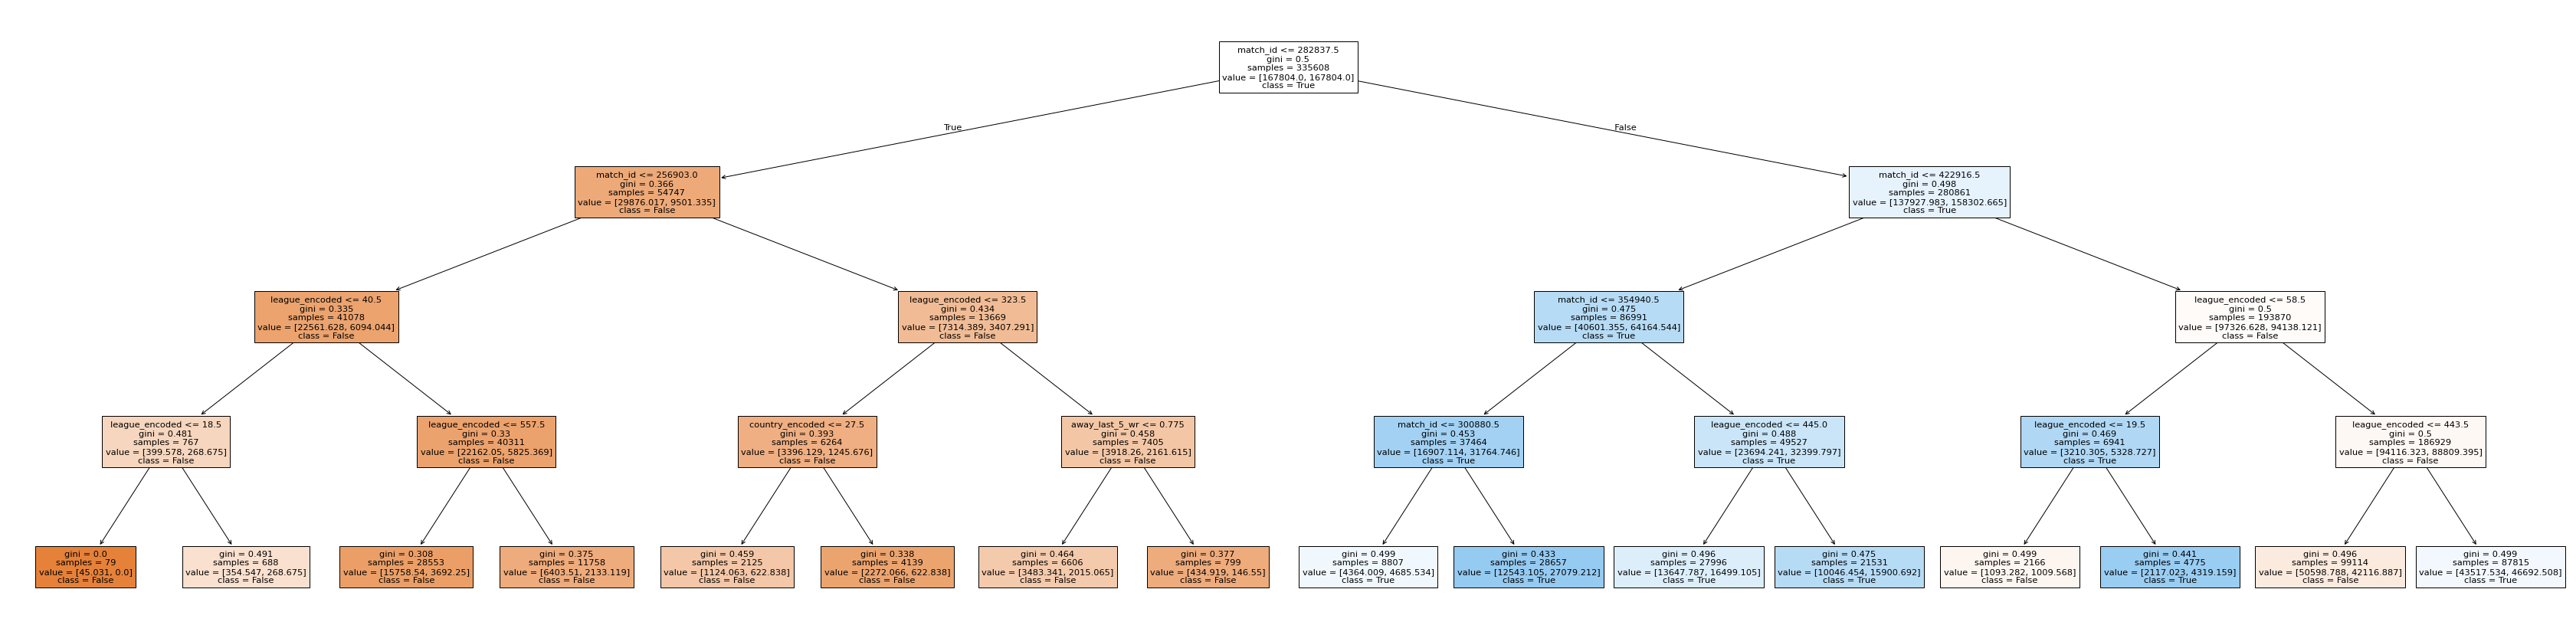

In [42]:
fig = pl.figure(figsize=(60,15))
_ = tree.plot_tree(model,feature_names=X.columns,class_names=['False','True'], filled=True)

### 2 - Dynamic

For the second model, the thought process is a little different.

I still haven't find a way to include data to training if the same columns aren't included in the test/validation samples, so the odds and results are still excluded, but I tried to overcome the time constraint in a different way, that probably ressembles what betting company do (or at least that's what I think they do).

By using dynamic training processes, we can leverage data better. The idea is to select random games from our dataset as validation games (so we don't only take the last games in time) and for each validation game, we slice our original dataset to include only past games, and train a new model each time.

Unfortunately, I couldn't get it to work in time (or maybe my theory clashes with the reality and simply would never work) but I believe this way of thinking might yield potential. The code I arrived at just takes too long to run.

I would be happy to show you my thought process and ask my questions to know if I was on the right path. I think it can be something that needs more powerful tools like distributed computing (Apache tools for example), or some other things I don't know about.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# We simulate the fact that such a model would only work with some past data that is untouched and not subject to validation
# That way, the latest game we take as test sample would still have 1000 games played prior to it to train a model on
starting_data = 1000


# Shuffle the DataFrame to create randomness
df_shuffled = pd.concat([Closing_Odds.copy()[:starting_data],Closing_Odds.copy()[starting_data:].sample(frac=1, random_state=42)])



# Split the DataFrame : 10% of the starting dataset as test, 10% as val, both taken from games played after the first 1000 
# Rest of it (80%) as remaining games, from which training data will be selected based on val/test game date.
test_val_sizes = int(len(df_shuffled)*.10)


test_games = df_shuffled.iloc[starting_data:test_val_sizes].sort_values(by=['match_id'])
validation_games = df_shuffled.iloc[starting_data+test_val_sizes:starting_data+test_val_sizes * 2].sort_values(by=['match_id'])
remaining_games = pd.concat([df_shuffled[:starting_data],
                             df_shuffled.iloc[starting_data+test_val_sizes * 2:]]).sort_values(by=['match_id'])


# Initialize results
validation_predictions = []
validation_truth = []

# Dynamic training for validation games
for _, game in validation_games.iterrows():
    
    # Slice training data to include only games before the current game's date
    training_data = remaining_games[remaining_games['match_date'] < game['match_date']]
    
    # Training features and target
    X_train = training_data[fixed_training_columns]    
    y_train = training_data['condition']
   
    # Validation features
    X_val = game[fixed_training_columns].to_frame().T

    y_val = game['condition']
    
    # Train model
    model = DecisionTreeClassifier(random_state=42, max_depth=3)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_val)
    validation_predictions.append(y_pred[0])
    validation_truth.append(y_val)

# Evaluate validation results
print(classification_report(validation_truth, validation_predictions))


KeyboardInterrupt: 